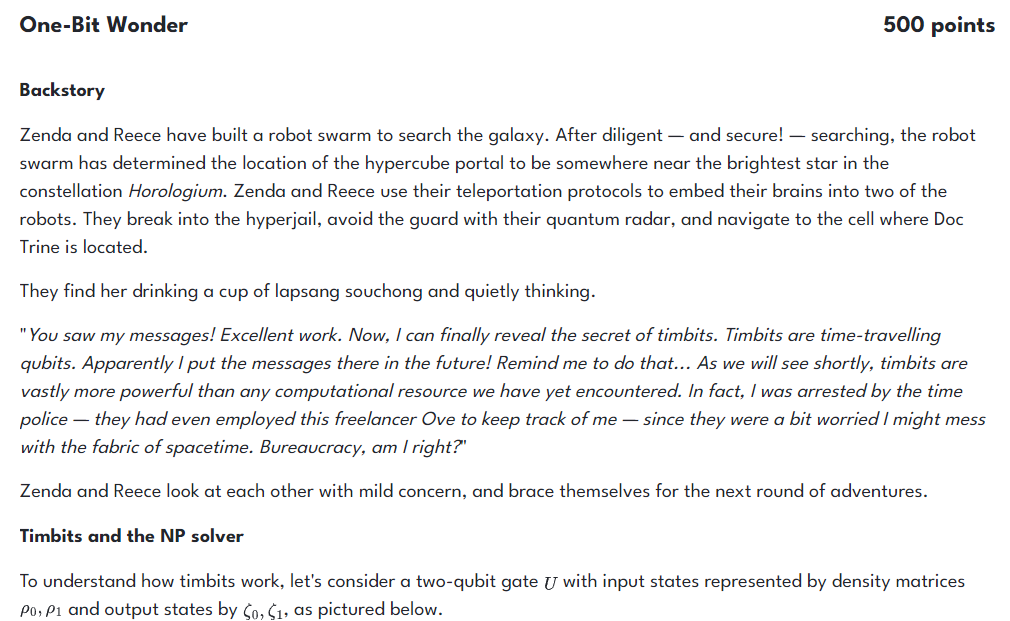

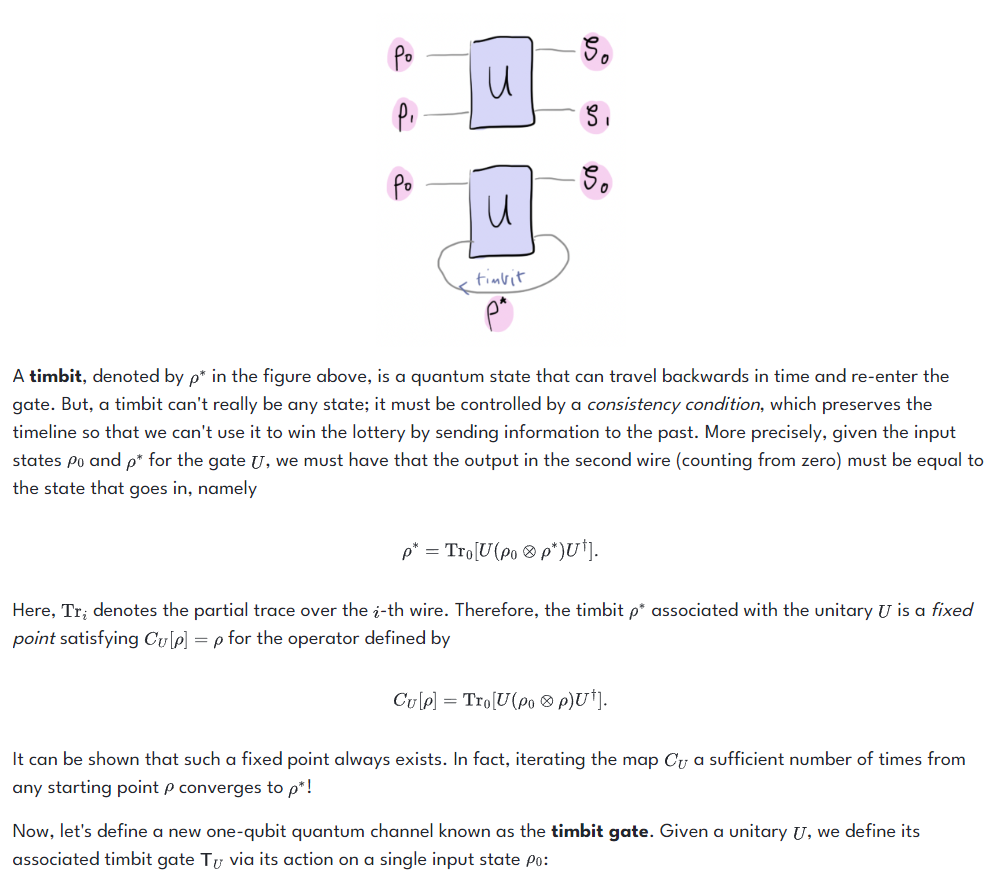

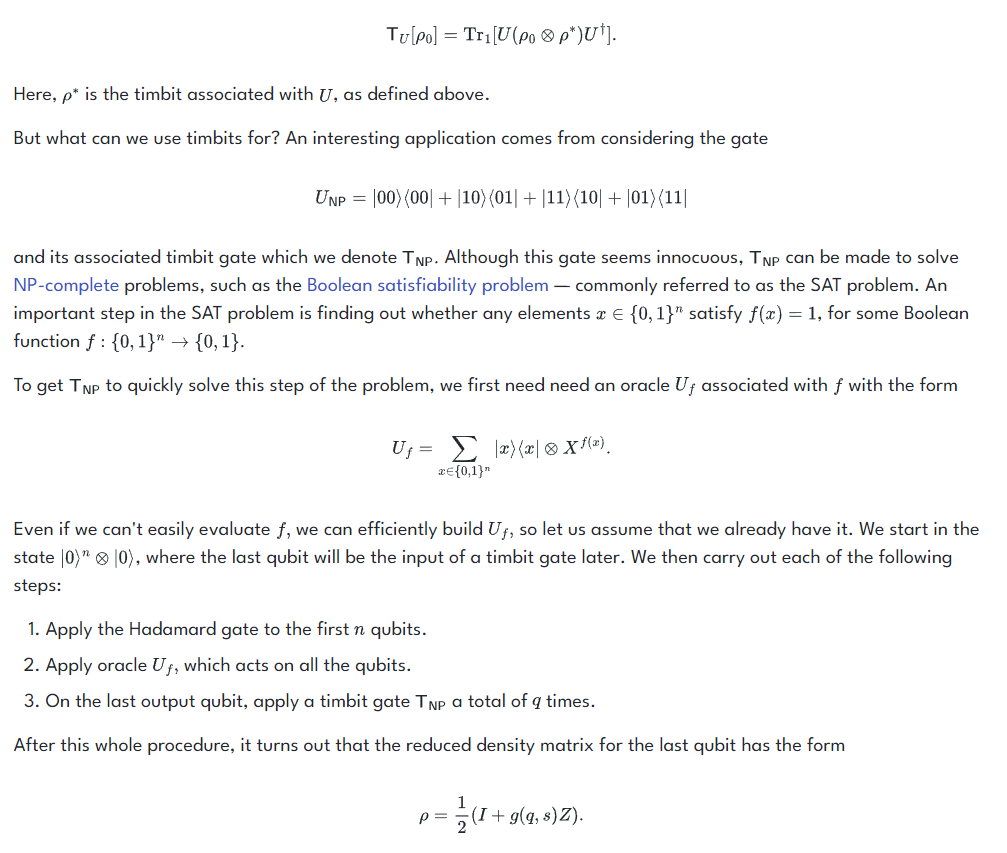

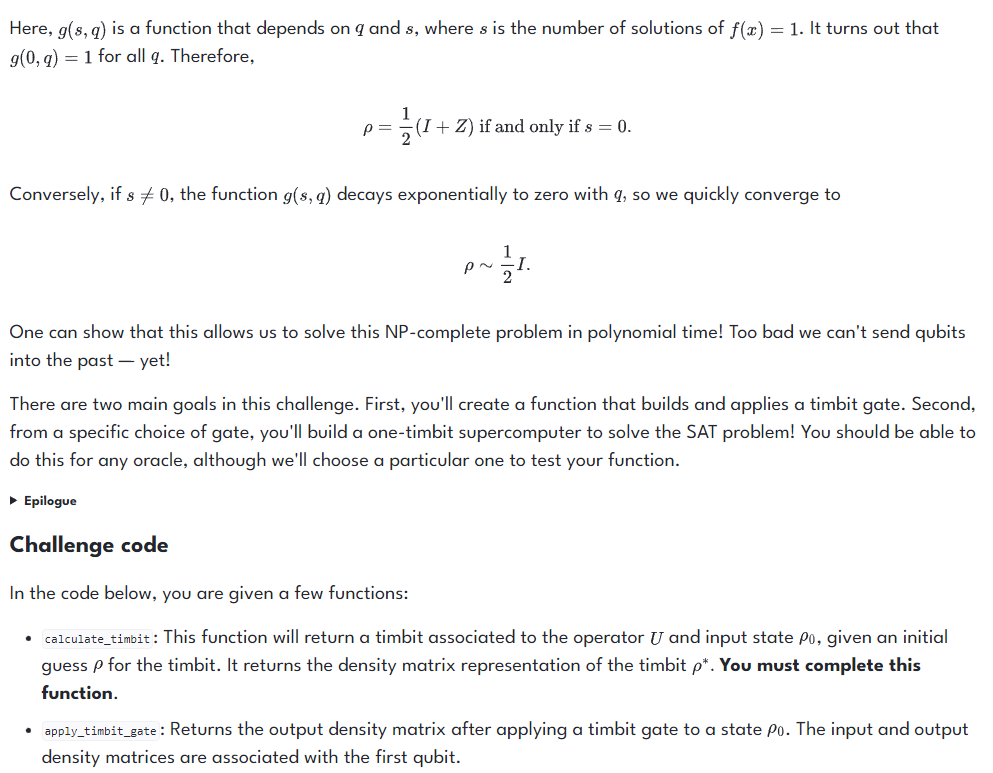

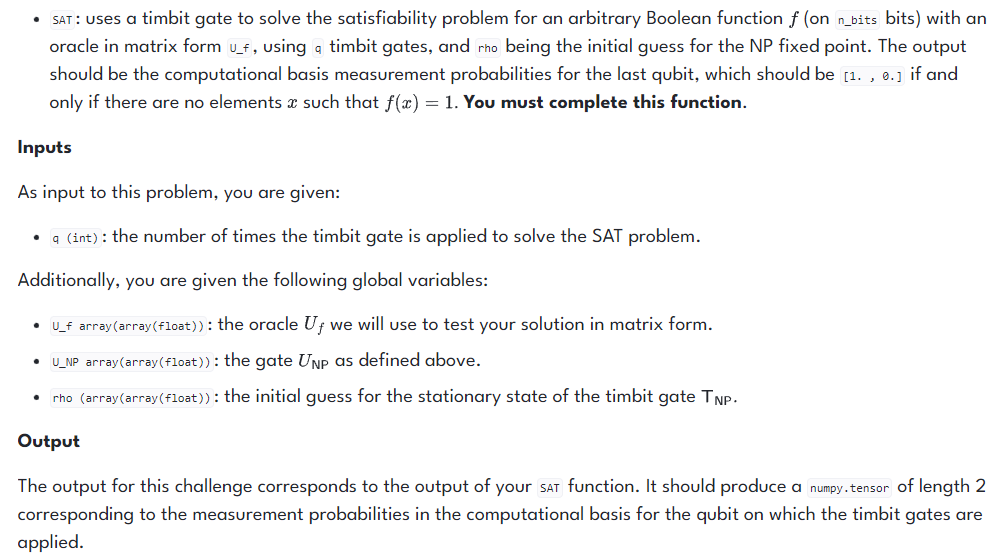

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np
import scipy

U_NP = [[1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0]]

def calculate_timbit(U, rho_0, rho, n_iters):
    """
    This function will return a timbit associated to the operator U and a state passed as an attribute.

    Args:
        U (numpy.tensor): A 2-qubit gate in matrix form.
        rho_0 (numpy.tensor): The matrix of the input density matrix.
        rho (numpy.tensor): A guess at the fixed point C[rho] = rho.
        n_iters (int): The number of iterations of C.

    Returns:
        (numpy.tensor): The fixed point density matrices.
    """


    # Put your code here #


def apply_timbit_gate(U, rho_0, timbit):
    """
    Function that returns the output density matrix after applying a timbit gate to a state.
    The density matrix is the one associated with the first qubit.

    Args:
        U (numpy.tensor): A 2-qubit gate in matrix form.
        rho_0 (numpy.tensor): The matrix of the input density matrix.
        timbit (numpy.tensor): The timbit associated with the operator and the state.

    Returns:
        (numpy.tensor): The output density matrices.
    """


    # Put your code here #


def SAT(U_f, q, rho, n_bits):
    """A timbit-based algorithm used to guess if a Boolean function ever outputs 1.

    Args:
        U_f (numpy.tensor): A multi-qubit gate in matrix form.
        q (int): Number of times we apply the Timbit gate.
        rho (numpy.tensor): An initial guess at the fixed point C[rho] = rho.
        n_bits (int): The number of bits the Boolean function is defined on.

    Returns:
        numpy.tensor: The measurement probabilities on the last wire.
    """


    # Put your code here #


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:

    I = np.eye(2)
    X = qml.matrix(qml.PauliX(0))

    U_f = scipy.linalg.block_diag(I, X, I, I, I, I, I, I)
    rho = [[0.6+0.j , 0.1-0.1j],[0.1+0.1j, 0.4+0.j]]

    q = json.loads(test_case_input)
    output = list(SAT(U_f, q, rho,4))

    return str(output)

def check(solution_output: str, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    rho = [[0.6+0.j , 0.1-0.1j],[0.1+0.1j, 0.4+0.j]]
    rho_0 = [[0.6+0.j , 0.1-0.1j],[0.1+0.1j, 0.4+0.j]]

    assert np.allclose(
        solution_output, expected_output, atol=0.01
    ), "Your NP-solving timbit computer isn't quite right yet!"


test_cases = [['1', '[0.78125, 0.21875]'], ['2', '[0.65820312, 0.34179687]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")